# Find tail

In this notebook, we explore methods to detect the motion of the robot tail.

In [1]:

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:

# load video
cap = cv2.VideoCapture(r'C:\Users\liuzy\Documents\tail-detection\0.005inThick_25mm_12V_C001H001S0002.avi')
ret, frame = cap.read()

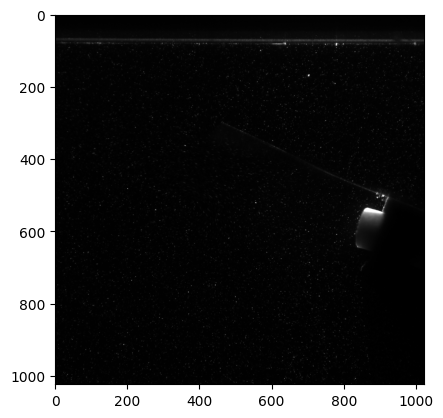

In [3]:
plt.imshow(frame)

In [4]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [5]:
from skimage import io, color
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [15]:
# Apply Gaussian blur to reduce noise
blurred = gaussian(gray, sigma=2.0)

# Enhance contrast using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_enhanced = clahe.apply((blurred * 255).astype(np.uint8))

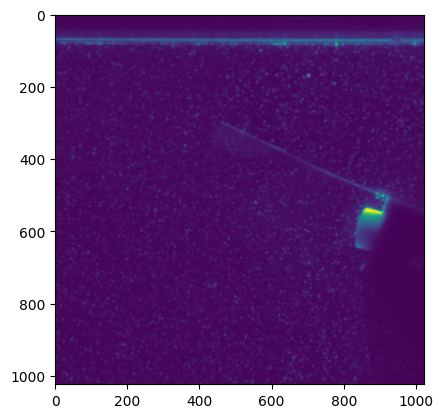

In [16]:
plt.imshow(contrast_enhanced)

In [8]:
# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(contrast_enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)

In [9]:
# Use morphological operations to remove small particles
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

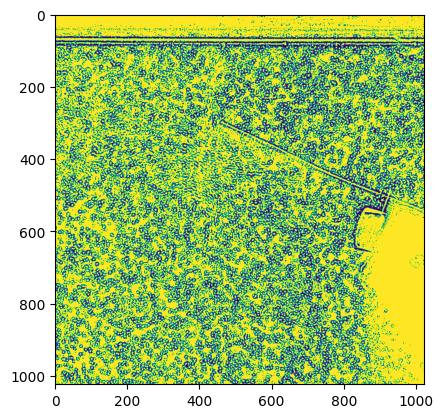

In [11]:
plt.imshow(thresh)

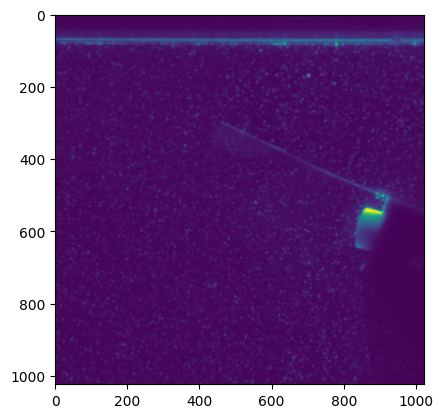

In [19]:
plt.imshow(contrast_enhanced)

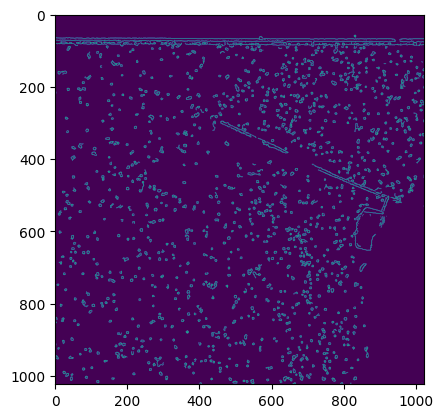

In [30]:
# Apply Canny edge detector
edges = cv2.Canny(contrast_enhanced, 5, 50)
# visualize edges.
plt.imshow(edges)

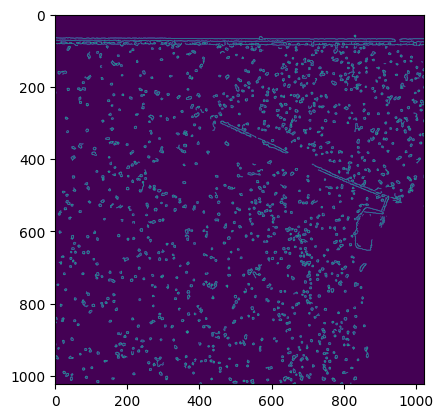